In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
retail_data = pd.read_csv('retail_price.csv')

In [3]:
retail_data.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [4]:
# info the dataset
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [5]:
# check for missing values
retail_data.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [6]:
# descriptive statistics
retail_data.describe()


,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


#  Exploatory data Analysis

In [12]:
import seaborn as sns
%matplotlib inline

C:\Users\chris\AppData\Local\Temp\ipykernel_59452\1045497971.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = retail_data.corr()


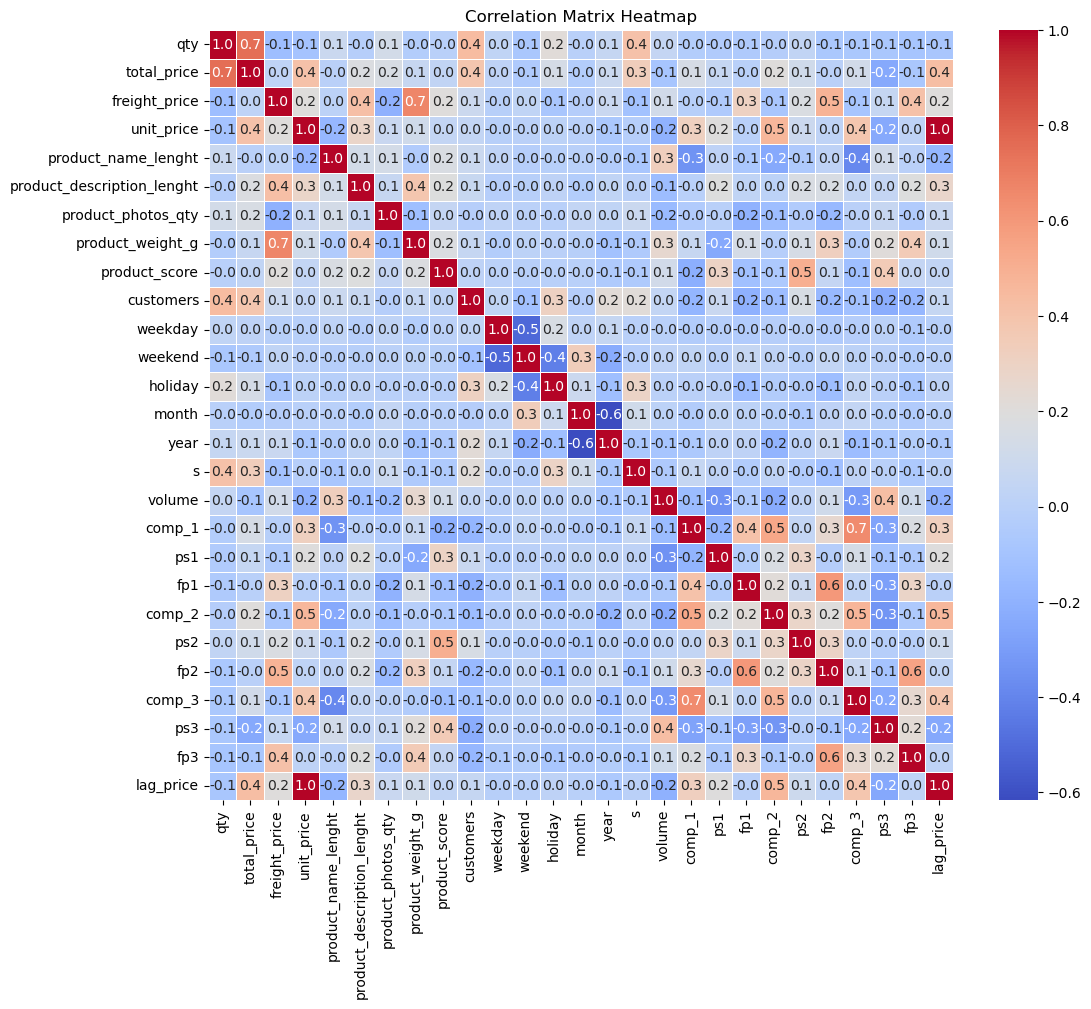

In [14]:


# Calculate the correlation matrix
correlation_matrix = retail_data.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()







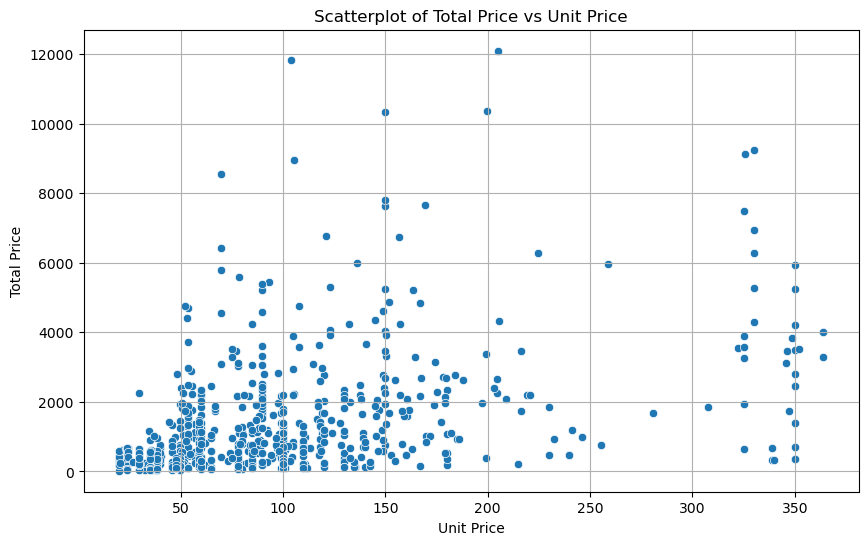

In [15]:
# Scatterplot for total_price vs unit_price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=retail_data['unit_price'], y=retail_data['total_price'])
plt.title('Scatterplot of Total Price vs Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Total Price')
plt.grid(True)
plt.show()

In [16]:
# Convert 'month_year' to datetime
retail_data['month_year'] = pd.to_datetime(retail_data['month_year'], format='%d-%m-%Y')

# Set 'month_year' as the index
retail_data.set_index('month_year', inplace=True)

# Resampling data monthly for smoother trends
monthly_total_price = retail_data['total_price'].resample('M').sum()
monthly_unit_price = retail_data['unit_price'].resample('M').mean()
monthly_qty = retail_data['qty'].resample('M').sum()
monthly_comp_prices = retail_data[['comp_1', 'comp_2', 'comp_3']].resample('M').mean()


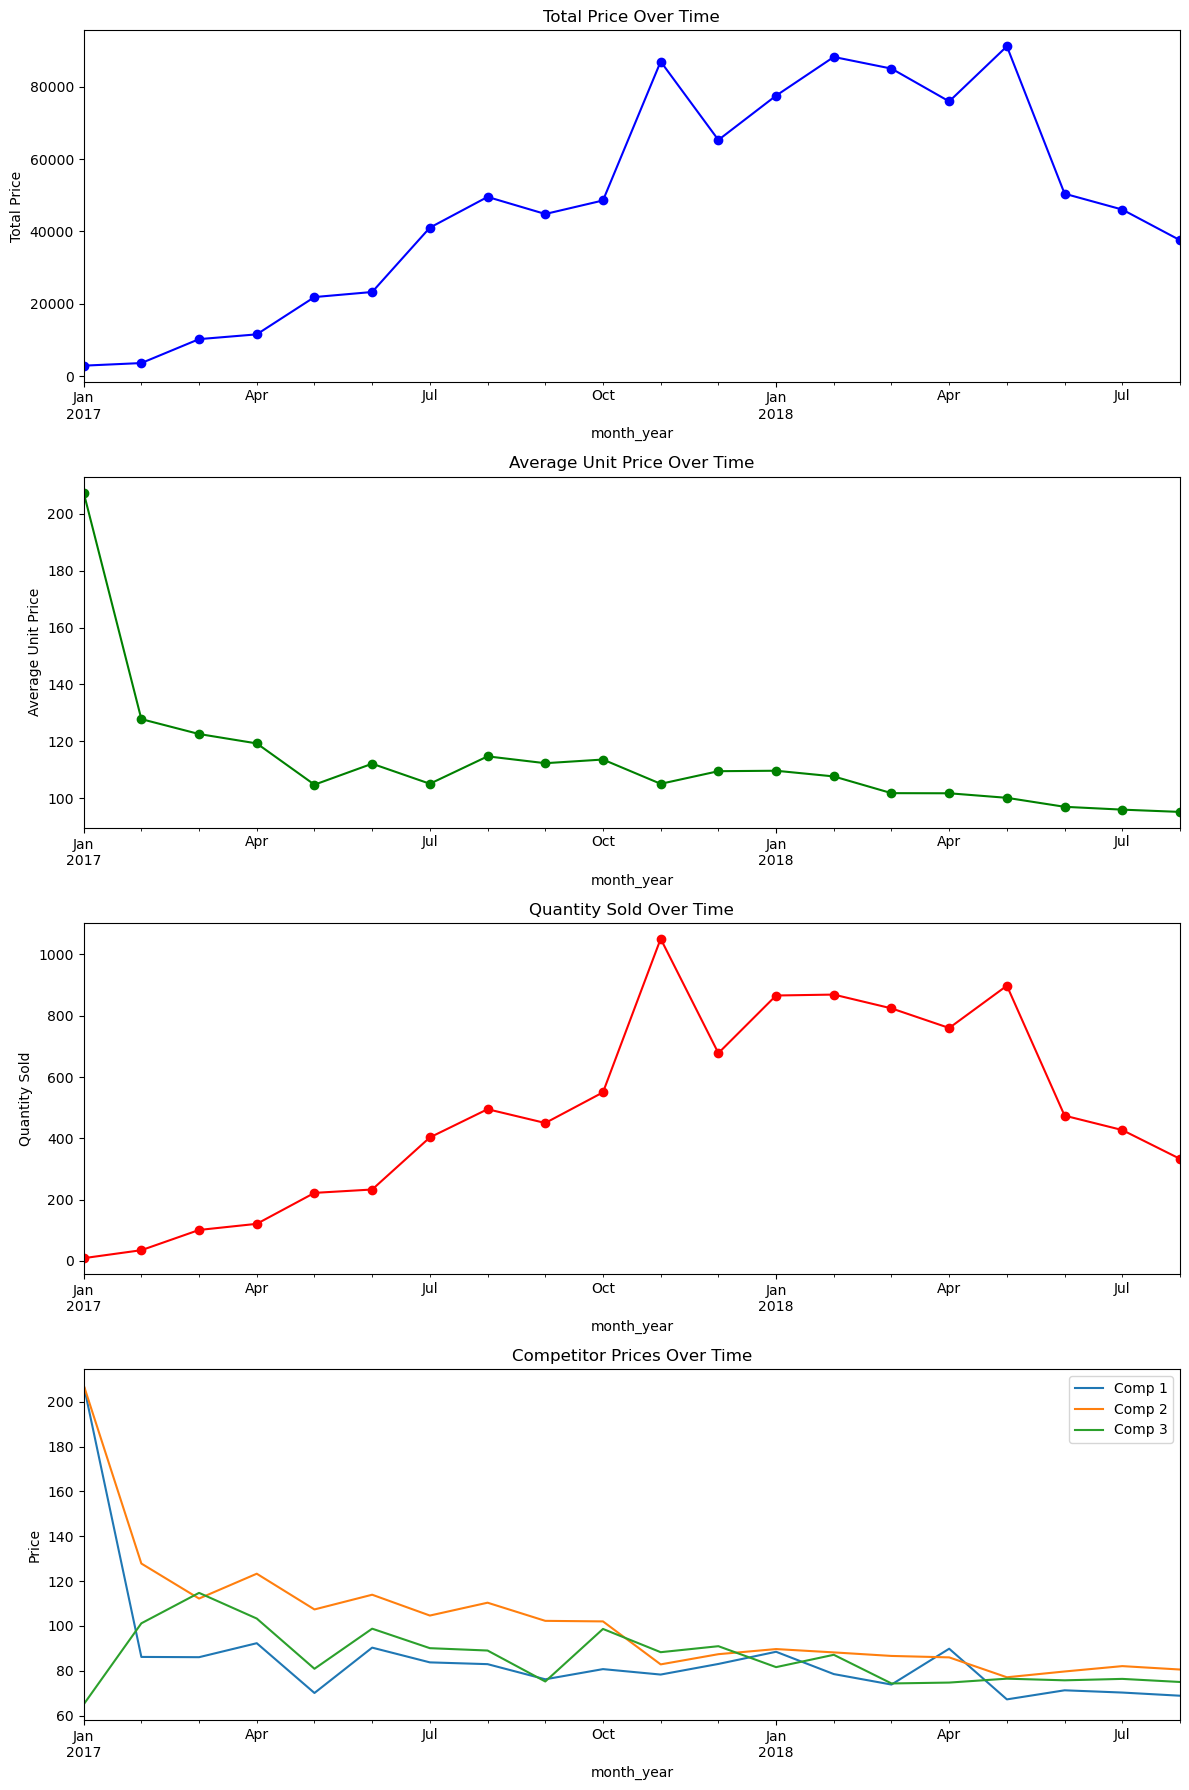

In [19]:
# Plotting trends
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 18))

# Plot total price trend
monthly_total_price.plot(ax=axes[0], title='Total Price Over Time', color='blue', marker='o')
axes[0].set_ylabel('Total Price')


# Plot unit price trend
monthly_unit_price.plot(ax=axes[1], title='Average Unit Price Over Time', color='green', marker='o')
axes[1].set_ylabel('Average Unit Price')

# Plot quantity sold trend
monthly_qty.plot(ax=axes[2], title='Quantity Sold Over Time', color='red', marker='o')
axes[2].set_ylabel('Quantity Sold')

# Plot competitor prices trend
monthly_comp_prices.plot(ax=axes[3], title='Competitor Prices Over Time')
axes[3].set_ylabel('Price')
axes[3].legend(['Comp 1', 'Comp 2', 'Comp 3'])

plt.tight_layout()
plt.show()
